# Full 3D Orientation


In [2]:
def weighted_median(values, weights):
    """
    Compute the weighted median of an array of values.
    
    This implementation sorts values and computes the cumulative
    sum of the weights. The weighted median is the smallest value for
    which the cumulative sum is greater than or equal to half of the
    total sum of weights.
    Parameters
    ----------
    values : array-like
        List or array of values on which to calculate the weighted median.
    weights : array-like
        List or array of weights corresponding to the values.
    Returns
    -------
    float
        The weighted median of the input values.
    """
    # Convert input values and weights to numpy arrays
    values = np.array(values)
    weights = np.array(weights)
    
    # Get the indices that would sort the array
    sort_indices = np.argsort(values)
    
    # Sort values and weights according to the sorted indices
    values_sorted = values[sort_indices]
    weights_sorted = weights[sort_indices]  

    # Compute the cumulative sum of the sorted weights
    cumsum = weights_sorted.cumsum()
    
    # Calculate the cutoff as half of the total weight sum
    cutoff = weights_sorted.sum() / 2.
    
    # Return the smallest value for which the cumulative sum is greater
    # than or equal to the cutoff
    return values_sorted[cumsum >= cutoff][0]

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
# user setup

# paths
path_to_data = '../../data/'
path_to_angles = '../../data/angles/'
metadata_file = 'metadata.csv'

In [5]:
# load angle data

angles_2401 = pd.read_pickle(path_to_angles + 'alhic2401_angles.df')

angles_2401.head()

,section,depth,AC-w1-angles,AC-w1-scores,AC-w1-length,DC-w1-angles,DC-w1-scores,DC-w1-length,AC-w2-angles,AC-w2-scores,AC-w2-length,DC-w2-angles,DC-w2-scores,DC-w2-length,AC-true-angles,AC-true-scores,DC-true-angles,DC-true-scores,AC-true-orientations,DC-true-orientations
0,1,1.930618,"[3.700000000000003, -6.700000000000003, 3.1000...","[0.991450323670263, 0.9881055721167635, 0.9883...","[0.6200000000000001, 0.6200000000000001, 0.689...","[74.30000000000001, 61.5, 63.400000000000006, ...","[0.9204102558074955, 0.9040821091885982, 0.944...","[0.5600000000000003, 0.5600000000000003, 0.560...","[-22.4, -56.2, -58.8, -66.4, -67.4, -33.599999...","[0.9869597761967785, 0.981600011436676, 0.9894...","[0.6000000000000001, 0.6000000000000001, 0.600...","[-59.2, -7.200000000000003, -39.8, 42.60000000...","[0.9621067775709733, 0.8958510973895679, 0.867...","[0.56, 0.56, 0.56, 0.56, 0.6399999999999999, 0...","[22.646500643767112, 56.22479129676473, 58.819...","[0.3561916744593046, 0.35233352368165294, 0.35...","[75.73529309570704, 74.30940176050251, 74.6939...","[0.24591527206238473, 0.21321149358693328, 0.1...","[8.916682702801367, 2.478835224290293, 2.24277...","[64.75479254982102, 87.96630503876659, 76.8192..."
1,10,6.708202,"[-22.799999999999997, -19.699999999999996, -20...","[0.9875820843731808, 0.9817070960755538, 0.981...","[0.6899999999999995, 0.6899999999999995, 0.689...","[28.30000000000001, -27.699999999999996, 6.300...","[0.9759568452665839, 0.9837725467028506, 0.963...","[0.6500000000000004, 0.6500000000000004, 0.650...","[-34.199999999999996, -27.299999999999997, -24...","[0.9076507194874656, 0.8882324902500687, 0.884...","[0.71, 0.71, 0.71, 0.71, 0.7699999999999996, 0...","[-9.200000000000003, -17.099999999999994, 0.90...","[0.9810478185584002, 0.9849005385219273, 0.925...","[0.6600000000000001, 0.6600000000000001, 0.660...",None,None,None,None,None,None
2,13,8.030456,"[-10.799999999999997, -28.5, -30.7999999999999...","[0.9352859440202971, 0.8927054308965103, 0.819...","[0.5600000000000005, 0.5600000000000005, 0.560...","[-59.7, -65.0, -57.4, 5.300000000000011, -15.1...","[0.860752344327061, 0.8144940678203136, 0.7851...","[0.5099999999999989, 0.5099999999999989, 0.509...","[3.200000000000003, -11.899999999999999, -12.1...","[0.924579802452898, 0.8753927109940216, 0.9184...","[0.5999999999999996, 0.5999999999999996, 0.659...","[-72.4, -66.1, 15.0, -46.0, -75.0, -32.6999999...","[0.8191048912865437, 0.8940159064996924, 0.870...","[0.5199999999999996, 0.5199999999999996, 0.519...",None,None,None,None,None,None
3,14,8.706966,"[-4.0, -14.799999999999997, -13.09999999999999...","[0.947416520431746, 0.9073700983909354, 0.9068...","[0.5700000000000003, 0.5700000000000003, 0.570...","[-22.599999999999994, -12.099999999999994, 72....","[0.9397932541096268, 0.817568962446102, 0.7901...","[0.4499999999999993, 0.4499999999999993, 0.449...","[-16.599999999999994, -21.0, -20.6999999999999...","[0.9505486514493829, 0.9237874976921634, 0.960...","[0.5100000000000016, 0.5100000000000016, 0.510...","[-16.799999999999997, -23.0, -53.0, -38.9, -29...","[0.8155984443946515, 0.7179797596552799, 0.645...","[0.4599999999999991, 0.4599999999999991, 0.459...",None,None,None,None,None,None
4,15,9.338848,"[-13.299999999999997, -20.9, -25.9, -26.199999...","[0.9625764557521744, 0.9583103859919628, 0.930...","[0.4900000000000002, 0.4900000000000002, 0.490...","[-43.9, -39.6, -29.099999999999994, -24.4, -26...","[0.9096987612811548, 0.9114199175754925, 0.915...","[0.45000000000000107, 0.45000000000000107, 0.4...","[-26.299999999999997, -21.699999999999996, -24...","[0.9831341412561401, 0.9777169661714058, 0.970...","[0.4800000000000004, 0.4800000000000004, 0.480...","[-46.3, -26.199999999999996, -24.4, -38.199999...","[0.9016315921640738, 0.8805996636660458, 0.821...","[0.4400000000000013, 0.4400000000000013, 0.440...",None,None,None,None,None,None


In [ ]:

for ACorDC in ['AC']:

    secs = []
    depths = []
    dips = []
    orientations = []
    scores = []
    medians = []

    for index, row in angles_2401.iterrows():

        print('Processing section %s' % (row['section']))


    
        w1_angle = row[ACorDC+'-w1-angles']
        w1_score = row[ACorDC+'-w1-scores']
        w2_angle = row[ACorDC+'-w2-angles']
        w2_score = row[ACorDC+'-w2-scores']
        w1_length = row[ACorDC+'-w1-length']
        w2_length = row[ACorDC+'-w2-length']



        if not w1_angle == None and not w2_angle == None and len(w1_angle) > 0 and len(w2_angle) > 0:

            secs.append(row['section'])
            depths.append(row['depth'])
            dip=[]
            orientation=[]
            score=[]

            for i in range(len(w1_angle)):

                a1 = w1_angle[i]
                
                for j in range(len(w2_angle)):
                        
                        a2=w2_angle[j]

                        score.append((w1_score[i]**2)*(w2_score[j]**2)*w1_length[i]*w2_length[j])
                        eps = np.arctan( 1/np.tan(a1*np.pi/180) * np.tan(a2 * np.pi/180)) * 180/np.pi
                        true = np.arctan(np.tan(a1 * np.pi/180) / np.cos(eps*np.pi/180))* 180/np.pi
                        eps = eps+90
                        if true<0:
                            eps = eps+180
                            true = true * -1
                        orientation.append(eps)
                        dip.append(true)

                        # calculate the weighted median of the dip and orientation
                        
            med = weighted_median(dip, score)
            print('    Weighted median dip: %s' % (med))

            dips.append(dip)
            orientations.append(orientation)
            scores.append(score)
            medians.append(med)

            
        else:
            print('No angles found for section %s' % (row['section']))
                

Processing section 1
    Weighted median dip: 58.813647006891664
Processing section 10
    Weighted median dip: 29.11096805338061
Processing section 13
    Weighted median dip: 24.07207928112838
Processing section 14
    Weighted median dip: 17.16965842224206
Processing section 15
    Weighted median dip: 31.779112203180972
Processing section 16
    Weighted median dip: 23.768579037318986
Processing section 17
    Weighted median dip: 21.705017880634973
Processing section 19
    Weighted median dip: 27.44023903285713
Processing section 2
    Weighted median dip: 57.85644010741349
Processing section 21
    Weighted median dip: 35.14044987454394
Processing section 23
    Weighted median dip: 48.91316331795482
Processing section 25
    Weighted median dip: 27.50118703444992
Processing section 26
    Weighted median dip: 42.97521479143832
Processing section 27
    Weighted median dip: 27.660888497539084
Processing section 28
No angles found for section 28
Processing section 30
    Weighted

/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_54567/3598683165.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  eps = np.arctan( 1/np.tan(a1*np.pi/180) * np.tan(a2 * np.pi/180)) * 180/np.pi


In [24]:
scores[0]

[0.24591527206238473,
 0.21321149358693328,
 0.19973157684478074,
 0.1750622458995345,
 0.22976263634311775,
 0.19410545444020677,
 0.18619625276329616,
 0.2880107607563061,
 0.24001780302105852,
 0.24973742733850673,
 0.23726755356543058,
 0.20571381781677128,
 0.19270792826443453,
 0.16890610517152116,
 0.22168293237211234,
 0.18727965092404114,
 0.1796485797961767,
 0.2778827359198401,
 0.23157747161188538,
 0.2409553010733715,
 0.2590928195679545,
 0.22463658549729887,
 0.21043433767846645,
 0.18444308281310223,
 0.24207463319481515,
 0.2045067354404659,
 0.19617371347799697,
 0.30344402543381954,
 0.2528793303876473,
 0.2631197877957178,
 0.26940130342099633,
 0.23357416477202667,
 0.21880685443019013,
 0.1917814897367469,
 0.2517060172357969,
 0.2126434116464748,
 0.20397884509511918,
 0.3155171034978997,
 0.2629405991577198,
 0.2735884919783767,
 0.2649114616295912,
 0.22968141802927186,
 0.2151602196634261,
 0.18858525966471804,
 0.24751108506218616,
 0.2090994968095621,
 0.200

Text(0, 0.5, 'Depth(m)')

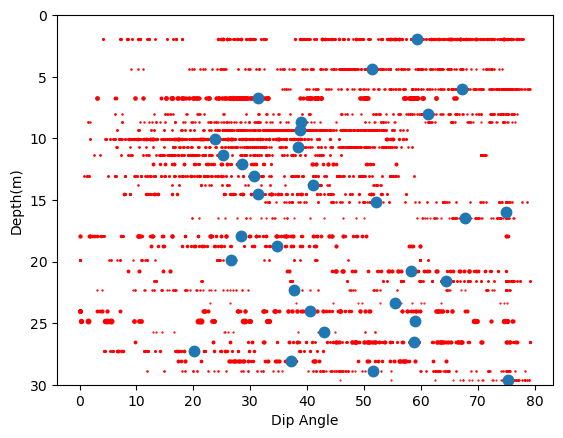

In [28]:
for i in range(len(dips)):
    dip_set = dips[i]
    s_set = scores[i]
    for j in range(len(dip_set)):
        plt.plot(dip_set[j],depths[i],'r.',markersize=(1+s_set[j])**4)
plt.plot(medians,depths,'.',markersize = 15)
plt.ylim([30,0])
plt.xlabel('Dip Angle')
plt.ylabel('Depth(m)')

In [ ]:
plt.plot(medians,depths,'.')
plt.ylim([30,0])
plt.xlabel('Dip Angle')
plt.ylabel('Depth(m)')

In [ ]:
def truedip(core,side,o_lost,title):
    # core='alhic2302'
    # side = 'l'
    # o_lost = [19.73,20.39,24.28,30.72,39.53,40.47,41.39,42.7]
    
    df = pd.read_pickle('../../data/angles/'+core+'_angles.df')
    for n in ['AC-true-angles','AC-true-scores',
       'DC-true-angles','DC-true-scores',
       'AC-true-orientations','DC-true-orientations']:
        df[n]=None

    
    # loop through all sections and compute drue dip
    for index, row in df.iterrows():
        
        #print("Running row "+str(row['section']))
        
        for ACorDC in ['AC','DC']:
            
            top_angle = row[ACorDC+'-w1-angles']
            top_score = row[ACorDC+'-w1-scores']
            side_angle = row[ACorDC+'-'+side+'-angles']
            side_score = row[ACorDC+'-'+side+'-scores']
            top_length = row[ACorDC+'-w1-length']
            side_length = row[ACorDC+'-'+side+'-length']
            
            dip=[]
            orientation=[]
            score=[]
            for i in range(len(top_angle)):

                a1 = top_angle[i]
                
                for j in range(len(side_angle)):
                    a2=side_angle[j]
                    score.append((top_score[i]**2)*(side_score[j]**2)*top_length[i]*side_length[j])
                    eps = np.arctan( 1/np.tan(a1*np.pi/180) * np.tan(a2 * np.pi/180)) * 180/np.pi
                    true = np.arctan(np.tan(a1 * np.pi/180) / np.cos(eps*np.pi/180))* 180/np.pi
                    eps = eps+90
                    if true<0:
                        eps = eps+180
                        true = true * -1
                    orientation.append(eps)
                    dip.append(true)
    
            # save to dataframe
            df.at[index,ACorDC+'-true-angles'] = dip
            df.at[index,ACorDC+'-true-scores'] = score
            df.at[index,ACorDC+'-true-orientations'] = orientation
    
    # save dataframe
    df.to_pickle('../../data/angles/'+core+'_angles.df')
    
    # make plot
    fig,axs = plt.subplots(1,2,figsize=(9,7),dpi=250)
    
    # track stats
    central_estimate = []
    
    # loop through and calcualte percentiles
    for index,row in df.iterrows():

        #print("Running row "+str(row['section']))
        for ACorDC,c in zip(['AC'],['r.']):
            dip = np.array(row[ACorDC+'-true-angles'])
            orientation = np.array(row[ACorDC+'-true-orientations'])
            scores = np.array(row[ACorDC+'-true-scores'])
            depth = row['depth']
            
            percentiles = [10,25,50,75,90]
            
            # plot dip
            dip_stats = weighted_percentile(dip, percentiles, weights=scores, interpolation='step')
            wiskerplot(depth,dip_stats,axs[0],ACorDC)
            
            central_estimate.append(dip_stats[2])
            
            # option to plot 
            for j in range(len(scores)):
                #axs[1].plot(orientation[j],depth,c,markersize=(scores[j])*10)
                axs[1].plot(orientation[j],depth,'k.',markersize=2)
                axs[0].plot(dip[j],depth,'k.',markersize=2)

            # alternative approach to orientation stats
            if False:
                orientation_stats = weighted_percentile(orientation, percentiles, weights=scores, interpolation='step')
                wiskerplot(depth,orientation_stats,axs[1],ACorDC)
                
            else:
                sort_index = np.argsort(orientation)
                orientation = orientation[sort_index]
                scores = scores[sort_index]
                spc_threshold = 180
                max_spc = orientation[0] + 360 - orientation[-1]
                bound1 = orientation[-1]
                bound2 = orientation[0]
                for i in range(len(orientation[:-2])):
                    if orientation[i+1]-orientation[i] > max_spc:
                        max_spc = orientation[i+1]-orientation[i]
                        bound1 = orientation[i]
                        bound2 = orientation[i+1]
                if max_spc > spc_threshold:
                    if bound1<bound2:
                        oshift = (orientation + 360-(bound1+bound2)/2)%360
                    else:
                        oshift = orientation
                    orientation_stats = weighted_percentile(oshift, percentiles, weights=scores, interpolation='step')
                    if bound1<bound2:
                        orientation_stats = (orientation_stats+(bound1+bound2)/2)%360
                    
                    wiskerplot(depth,orientation_stats,axs[1],ACorDC)
                #else:
                    
                #    print("    Too small of a gap!")
            

            
    # housekeeping
    axs[0].set_xlabel('Angle (degrees)')
    axs[1].set_xlabel('Orientation (degrees)')
    axs[0].set_ylabel('Depth (m)')
    axs[1].set_ylabel('Depth (m)')
    axs[0].set_title('Dip Angle (Relative to Horizontal)')
    axs[1].set_title('Dip Direction (Relative to Orientation Line)')
    axs[0].grid()
    axs[1].grid()
    axs[0].set_xlim([0,90])
    axs[1].set_xlim([0,360])
    topcushion = (max(df['depth'])-min(df['depth']))/3.5
    axs[0].set_ylim([max(df['depth'])+topcushion/5,min(df['depth'])-topcushion])
    axs[1].set_ylim([max(df['depth'])+topcushion/5,min(df['depth'])-topcushion])
    axs[1].yaxis.tick_right()
    axs[1].yaxis.set_label_position("right")

    vertical_line = lines.Line2D([], [], color='k', marker='|',
                                 linestyle='None', markersize=10,
                                 markeredgewidth=1.5, label='Median')
    # make plot for axis labels
    for a in axs:
        a.plot([-10,-10],[0,1],'k-',label='Median') 
        a.add_patch(Rectangle((-20,0),10,10,
                                facecolor='r',
                                edgecolor='k',
                                linewidth=1.5,
                                label='Weighted Interquartile Range'))
        a.plot([-20,-10],[0,0],'k-',label='Weighted 10%-90% Percentile Range') 
        a.plot([-20],[0],'k.',label='Outlying Estimates') 
    
    # Orientation lost
    if len(o_lost)>0:
        for d in o_lost:
            axs[1].plot([0,360],[d,d],'g-',linewidth=2,label='Orientation Lost')
    

    # make the legend 
    handles, labels = axs[0].get_legend_handles_labels()
    handles.insert(0,vertical_line)
    labels.insert(0,'Weighted Median')
    by_label = dict(zip(labels, handles))
    axs[0].legend(by_label.values(), by_label.keys(),loc='upper right')
    handles, labels = axs[1].get_legend_handles_labels()
    handles.insert(0,vertical_line)
    labels.insert(0,'Weighted Median')
    by_label = dict(zip(labels, handles))
    axs[1].legend(by_label.values(), by_label.keys(),loc='upper right')
    fig.suptitle(title)
    plt.tight_layout()
    fig.savefig('../../../figures/orientations/'+core+'_angleplot.png')
    
    # print stats:
    print(central_estimate)
    est = np.array(central_estimate)
    print("Core: "+core)
    print("    min = "+str(np.min(est)))
    print("    max = "+str(np.max(est)))
    print("    mean = "+str(np.mean(est)))
    print("    std = "+str(np.std(est)))
    
    #%% Make another plot
    
    fig2,axs2 = plt.subplots(1,1,dpi=200)

    weighted_mean=[]
    weighted_std = []
    
    # loop through and calcualte percentiles
    for index,row in df.iterrows():
        #print("Running row "+str(row['section']))
        for ACorDC,c in zip(['AC'],['r.']):
            dip = np.array(row[ACorDC+'-true-angles'])
            orientation = np.array(row[ACorDC+'-true-orientations'])
            scores = np.array(row[ACorDC+'-true-scores'])
            depth = row['depth']
    
                
            weighted_stats = DescrStatsW(dip, weights=scores, ddof=0)
            weighted_mean.append(weighted_stats.mean)
            weighted_std.append(weighted_stats.std)
            
    axs2.plot(abs(weighted_mean-np.mean(weighted_mean)),weighted_std,'k.')
            
    axs2.set_xlabel('Difference from Average Weighted Mean')
    axs2.set_ylabel('Weigthed Standard Deviation')
    axs2.set_title(core)
            
    fig2.savefig('../../../figures/orientations/'+core+'_dipspread.png')
    
    #%% Make another plot
    
    fig3,axs3 = plt.subplots(1,1,dpi=200)

    weighted_mean=[]
    weighted_std = []
    spread = []
    
    # loop through and calcualte percentiles
    for index,row in df.iterrows():
        #print("Running row "+str(row['section']))
        for ACorDC,c in zip(['AC'],['r.']):
            dip = np.array(row[ACorDC+'-true-angles'])
            orientation = np.array(row[ACorDC+'-true-orientations'])
            scores = np.array(row[ACorDC+'-true-scores'])
            depth = row['depth']
    
                
            weighted_stats = DescrStatsW(dip, weights=scores, ddof=0)
            weighted_mean.append(weighted_stats.mean)
            weighted_std.append(weighted_stats.std)
            spread.append(row['10-90 percentile spread'])
            
            
    axs3.plot(spread,weighted_std,'k.')
            
    axs3.set_xlabel('10-90 Percentile Ratio')
    axs3.set_ylabel('Weighted Standard Deviation')
    axs3.set_title(core)
    
            
    fig3.savefig('../../../figures/orientations/'+core+'_dip_percentile.png')
    
    
#%% Run



In [ ]:
truedip('alhic2401','w2',[0],'ALHIC2401')
